In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset from the uploaded file
bh_data = pd.read_csv('D:/CS Classes at GT/CS 7641 - ML/ASSIGNMENT-1/boston.csv')
print(bh_data.head())
print(bh_data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

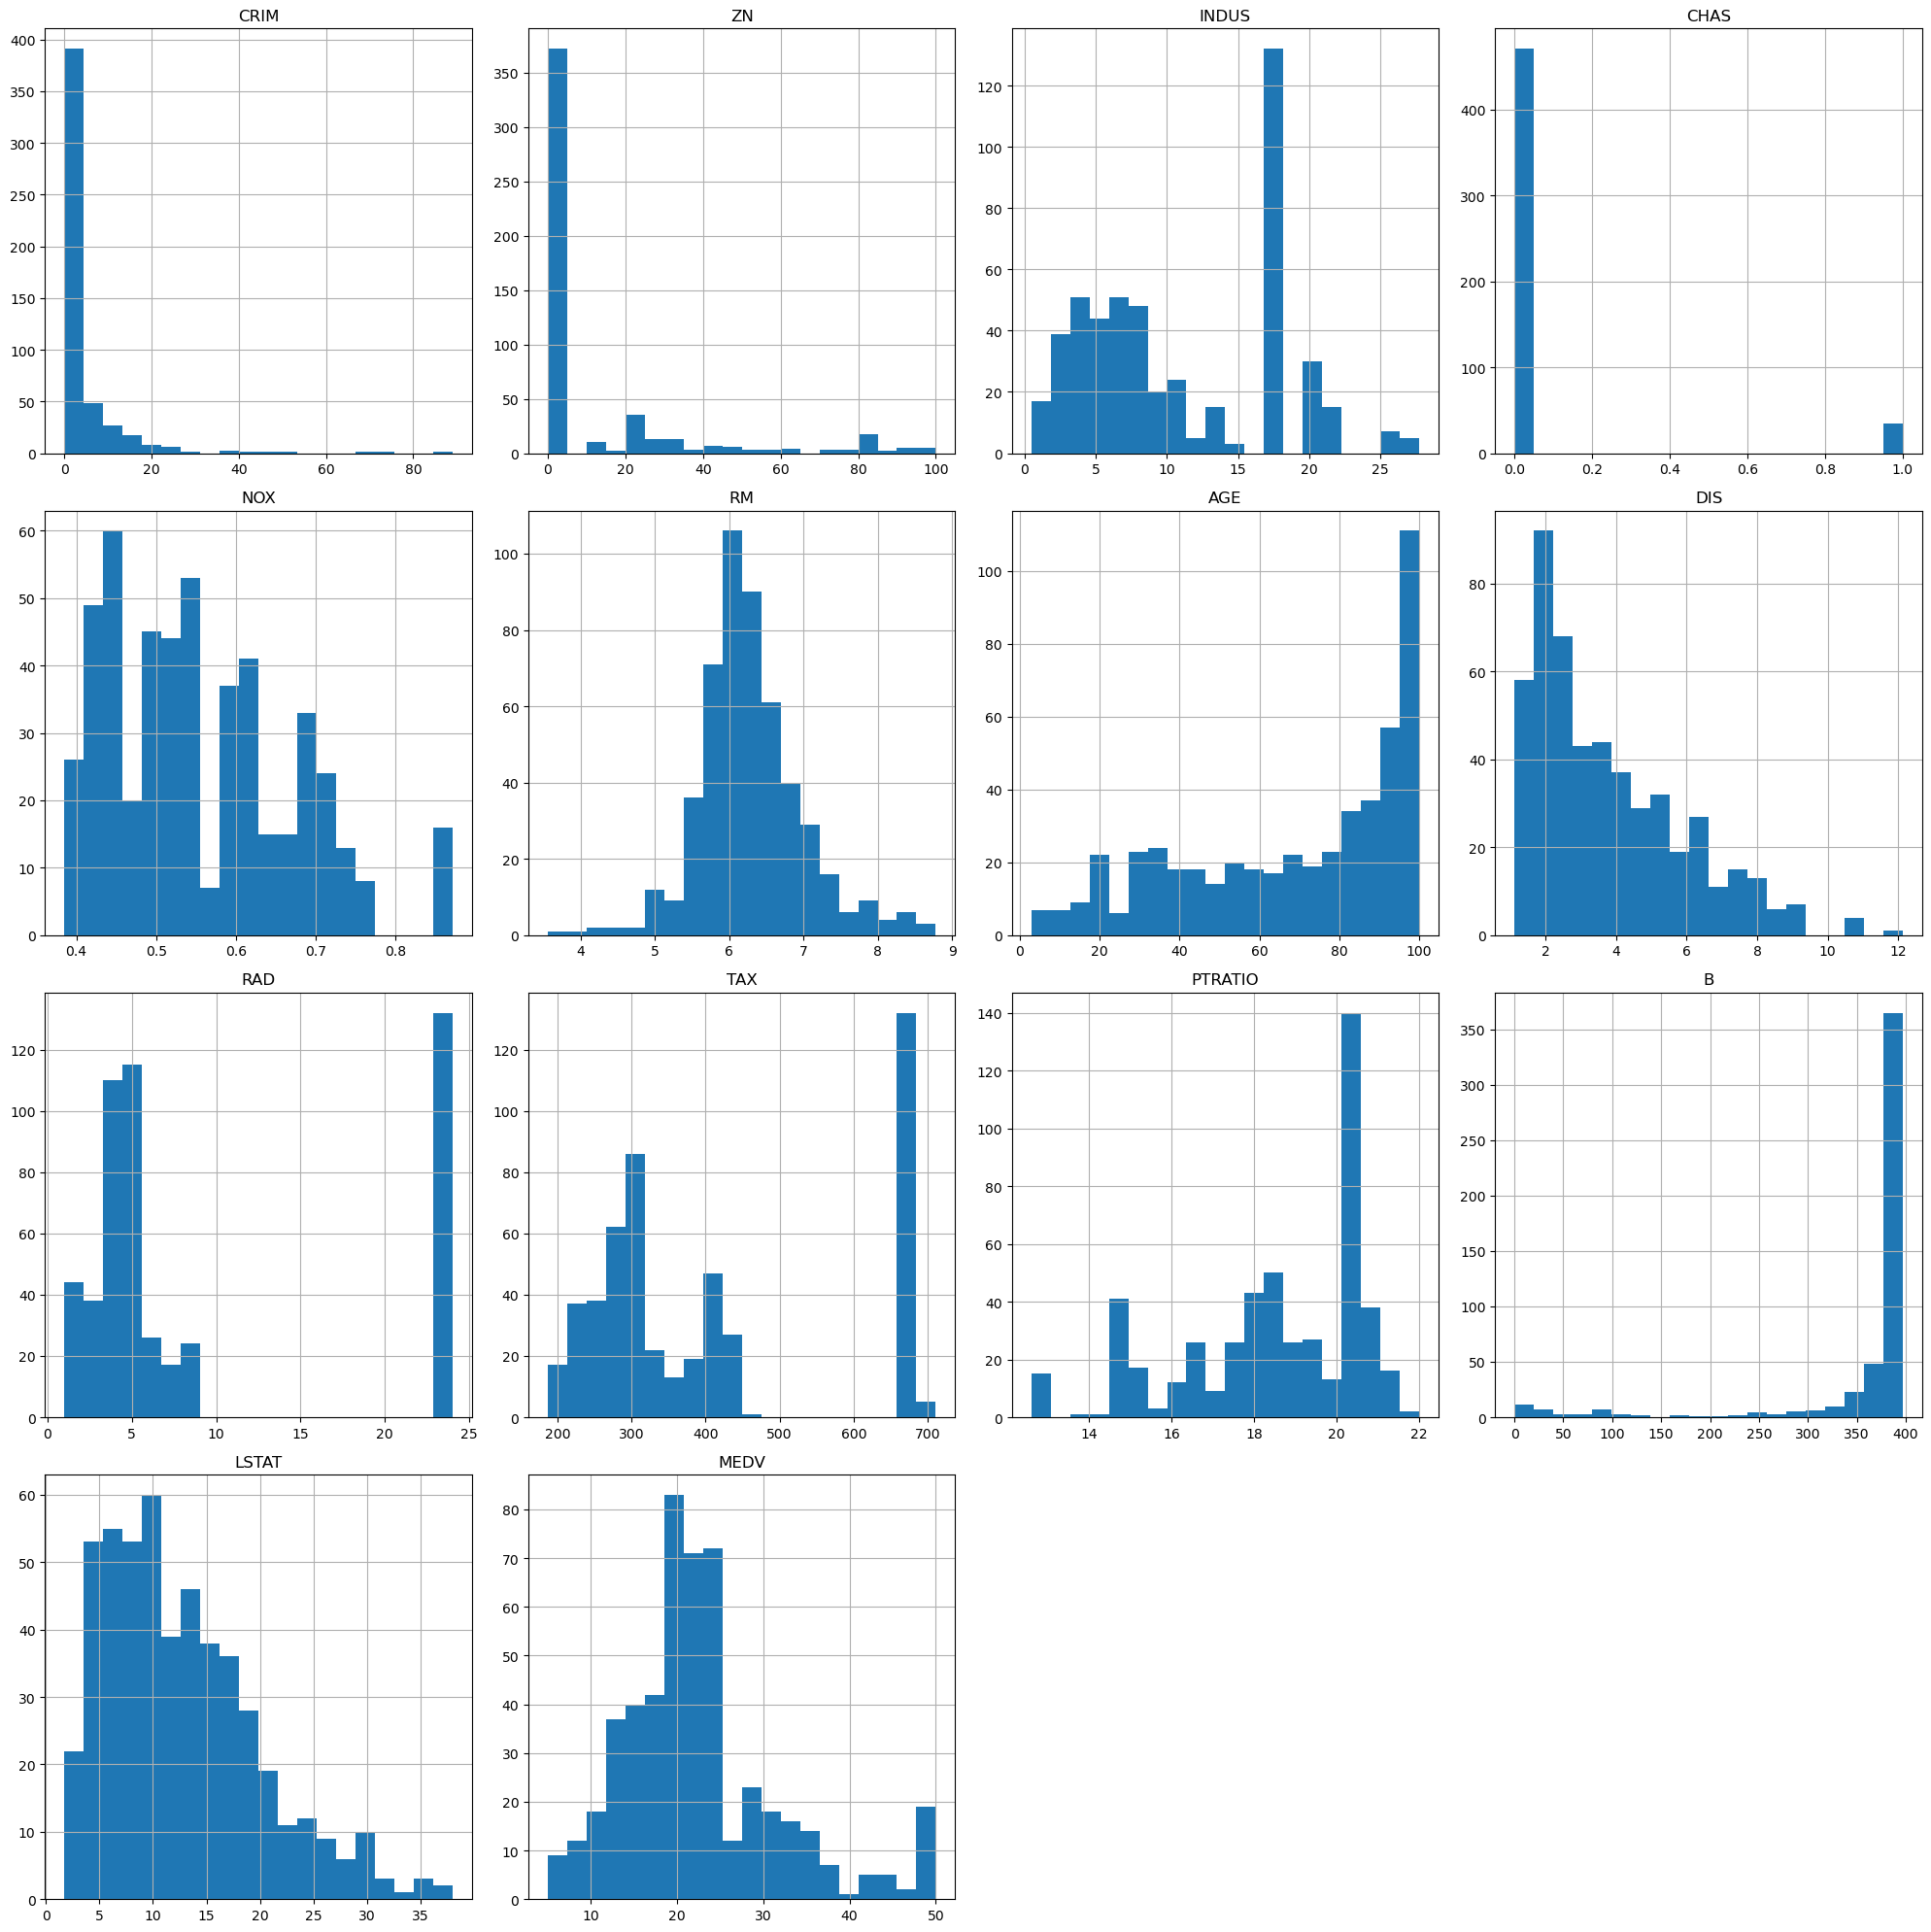

In [2]:
# Visualize the distribution of each feature in the dataset
bh_data.hist(figsize=(20, 20), bins=20)
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


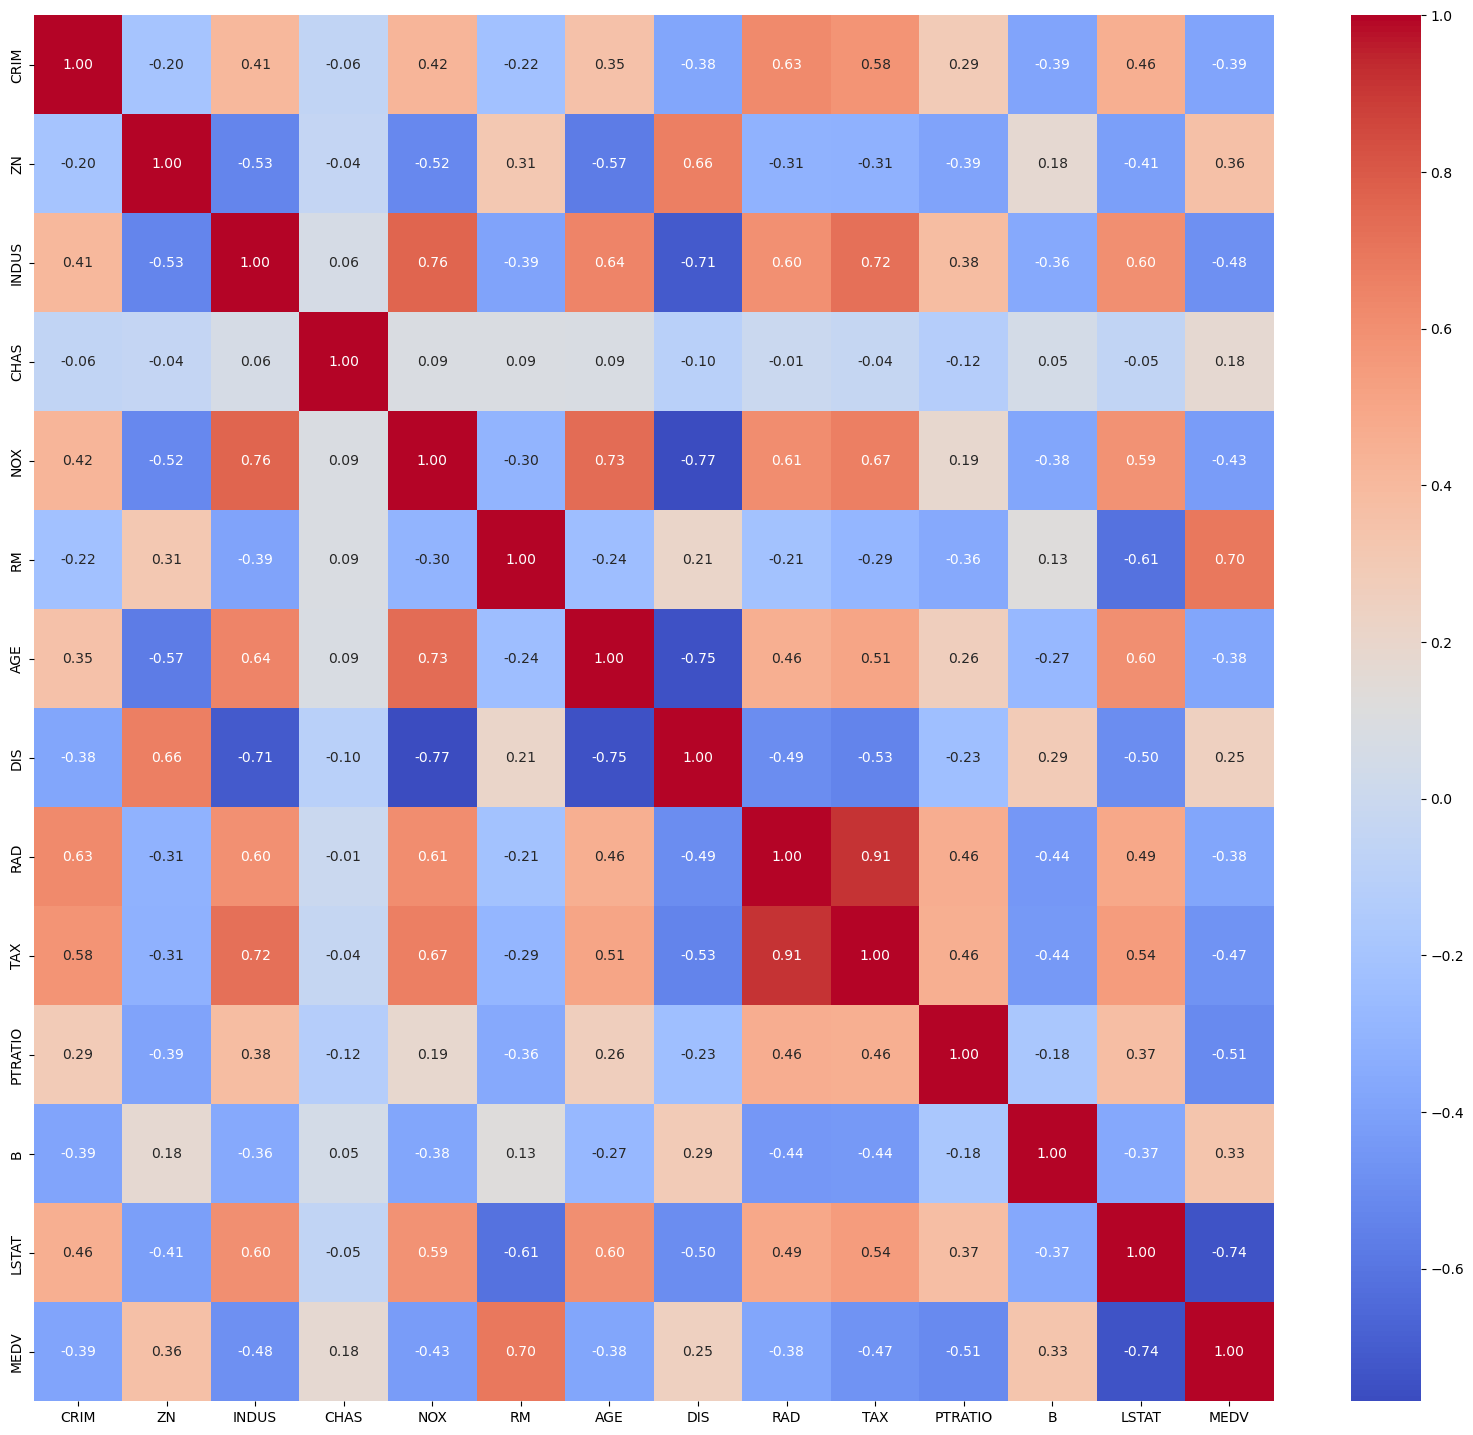

In [23]:
plt.figure(figsize=(20, 18))
# Generate a heatmap for the correlation matrix of the Boston Housing dataset
sns.heatmap(bh_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

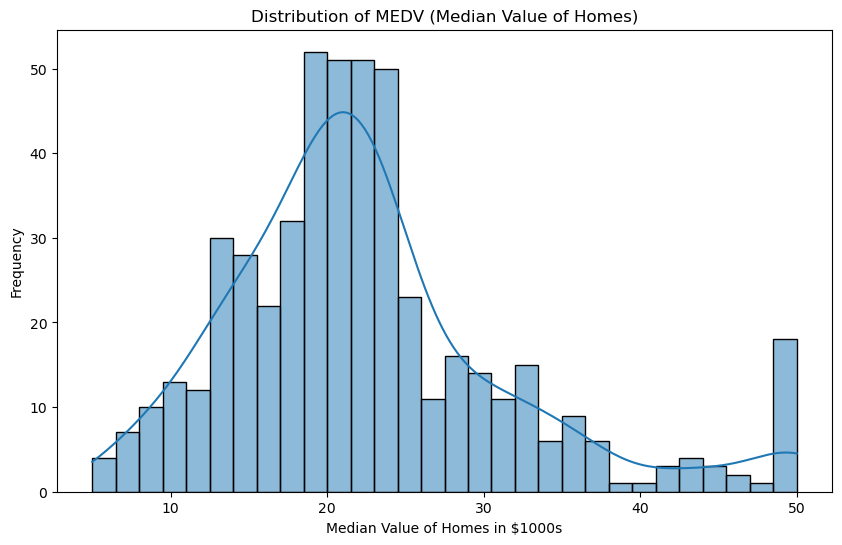

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(bh_data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('Median Value of Homes in $1000s')
plt.ylabel('Frequency')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (independent variables) and the target (dependent variable)
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model with a linear kernel to start
svr_linear = SVR(kernel='linear')

# Train the model on the training data
svr_linear.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = svr_linear.predict(X_test)

# Calculate and print the mean squared error and the r2 score for the linear kernel
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Kernel SVR Mean Squared Error: {mse_linear}')
print(f'Linear Kernel SVR R² Score: {r2_linear}')

# Now let's perform hyperparameter tuning using GridSearchCV
# Define a range of hyperparameters for the SVR
parameters = {
    'C': [0.1, 1, 10, 100],  # Example range, adjust based on results
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  # Example range for RBF kernel
    'kernel': ['linear', 'rbf'],  # Starting with two kernels
}

# Create a scorer for R2 to maximize
r2_scorer = make_scorer(r2_score)

# Initialize GridSearchCV with the SVR model and the range of parameters
grid_search = GridSearchCV(SVR(), parameters, cv=5, scoring=r2_scorer, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_svr = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_best = best_svr.predict(X_test)

# Calculate and print the mean squared error and the r2 score for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Best SVR Model Mean Squared Error: {mse_best}')
print(f'Best SVR Model R² Score: {r2_best}')

# Print the best parameters
print(f'Best parameters found: {grid_search.best_params_}')


Linear Kernel SVR Mean Squared Error: 24.939283046719215
Linear Kernel SVR R² Score: 0.6653033556496879
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best SVR Model Mean Squared Error: 11.865931992343954
Best SVR Model R² Score: 0.8407537372872077
Best parameters found: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


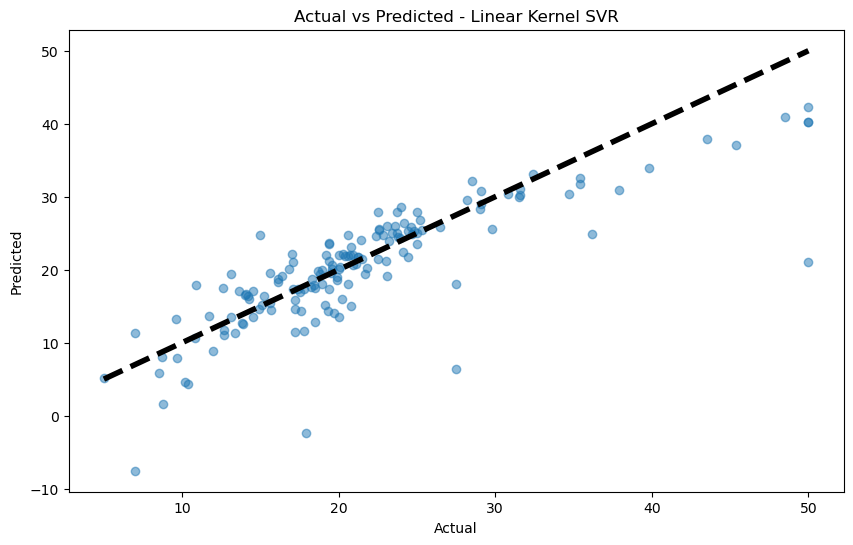

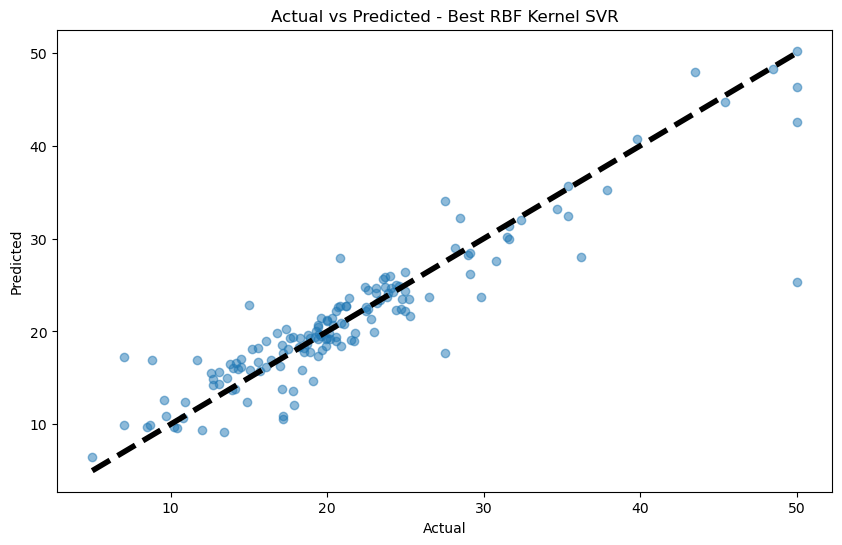

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

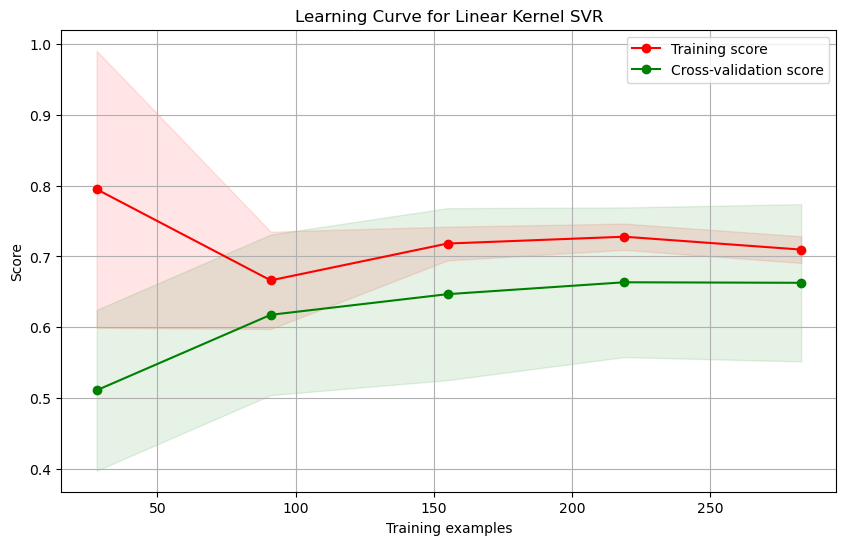

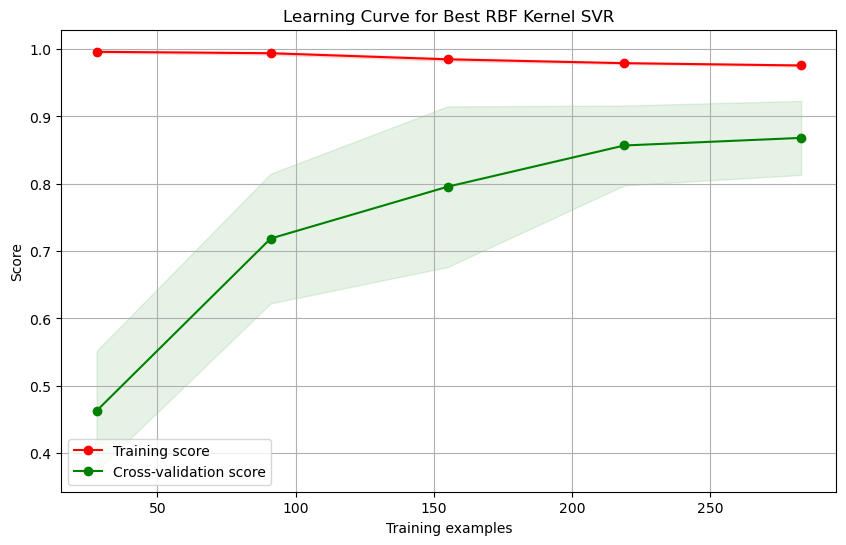

In [27]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for linear kernel
plot_actual_vs_predicted(y_test, y_pred_linear, 'Actual vs Predicted - Linear Kernel SVR')

# Plot for best RBF kernel model
plot_actual_vs_predicted(y_test, y_pred_best, 'Actual vs Predicted - Best RBF Kernel SVR')

# Function to plot learning curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))
    
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="r2")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot learning curve for linear kernel SVR
plot_learning_curve(svr_linear, "Learning Curve for Linear Kernel SVR", X_train, y_train, cv=5)

# Plot learning curve for the best RBF kernel SVR model
plot_learning_curve(best_svr, "Learning Curve for Best RBF Kernel SVR", X_train, y_train, cv=5)


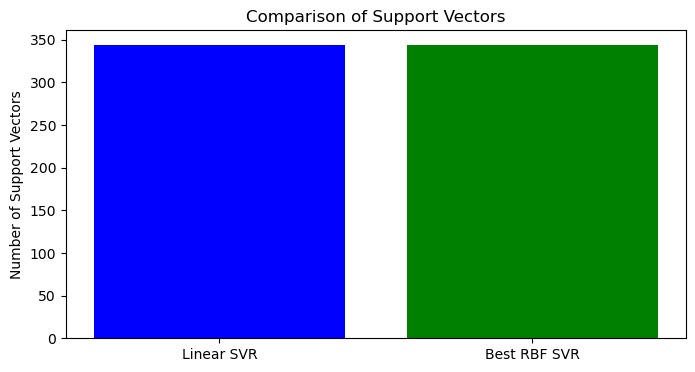

Number of support vectors for Linear Kernel: 344
Number of support vectors for RBF Kernel: 344


In [28]:
# Train the linear kernel SVR model
svr_linear = SVR(kernel='linear', C=100)  # Using the same C value as the RBF kernel for fair comparison
svr_linear.fit(X_train, y_train)

# Number of support vectors for each class
num_support_vectors_linear = svr_linear.support_.size
num_support_vectors_rbf = best_svr.support_.size

# Plot the number of support vectors for comparison
plt.figure(figsize=(8, 4))
plt.bar(['Linear SVR', 'Best RBF SVR'], [num_support_vectors_linear, num_support_vectors_rbf], color=['blue', 'green'])
plt.ylabel('Number of Support Vectors')
plt.title('Comparison of Support Vectors')
plt.show()
print(f'Number of support vectors for Linear Kernel: {num_support_vectors_linear}')
print(f'Number of support vectors for RBF Kernel: {num_support_vectors_rbf}')


Cross-validation R2 scores for Linear Kernel: [0.76253658 0.71869499 0.553607   0.1356931  0.0547334 ]
Mean R2 for Linear Kernel: 0.4450530145104503
Cross-validation R2 scores for RBF Kernel: [ 0.69412649  0.69332984  0.81264657  0.53456578 -2.25883892]
Mean R2 for RBF Kernel: 0.09516595009829203


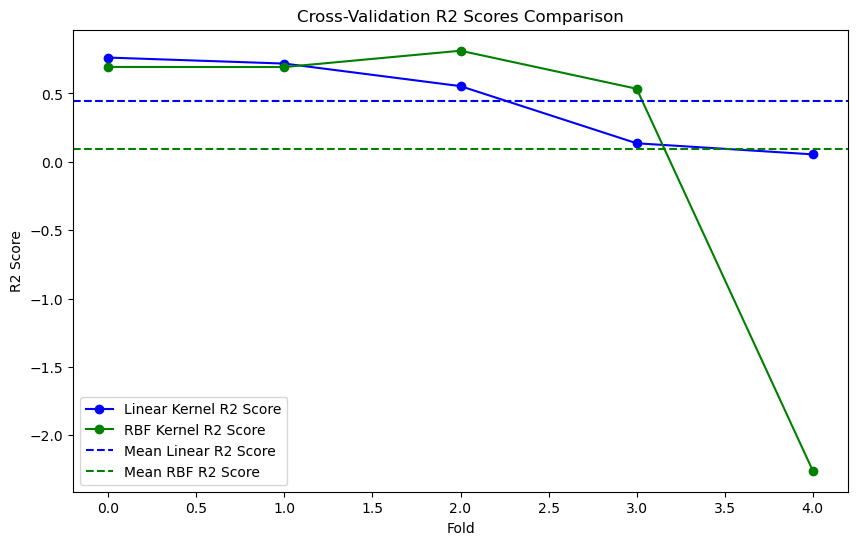

In [29]:
# Cross-validation for the linear kernel SVR model
cv_r2_scores_linear = cross_val_score(svr_linear, X_scaled, y, cv=5, scoring='r2')

# Cross-validation for the RBF kernel SVR model
cv_r2_scores_rbf = cv_r2_scores  # This is from the previous RBF kernel cross-validation
# Print the cross-validation R2 scores and their mean for linear kernel
print(f'Cross-validation R2 scores for Linear Kernel: {cv_r2_scores_linear}')
print(f'Mean R2 for Linear Kernel: {np.mean(cv_r2_scores_linear)}')


# Print the cross-validation R2 scores and their mean for RBF kernel
print(f'Cross-validation R2 scores for RBF Kernel: {cv_r2_scores_rbf}')
print(f'Mean R2 for RBF Kernel: {np.mean(cv_r2_scores_rbf)}')
# Plot cross-validation results for comparison
plt.figure(figsize=(10, 6))
plt.plot(cv_r2_scores_linear, label='Linear Kernel R2 Score', color='blue', marker='o')
plt.plot(cv_r2_scores_rbf, label='RBF Kernel R2 Score', color='green', marker='o')
plt.axhline(np.mean(cv_r2_scores_linear), label='Mean Linear R2 Score', color='blue', linestyle='--')
plt.axhline(np.mean(cv_r2_scores_rbf), label='Mean RBF R2 Score', color='green', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('Cross-Validation R2 Scores Comparison')
plt.legend()
plt.show()


Linear Kernel SVR Mean Squared Error: 25.33072194084679
Linear Kernel SVR Mean Absolute Error: 3.1700079987599614
Linear Kernel SVR R² Score: 0.6600500657260253
Best RBF Kernel SVR Mean Squared Error: 11.865931992343954
Best RBF Kernel SVR Mean Absolute Error: 2.138127574544008
Best RBF Kernel SVR R² Score: 0.8407537372872077


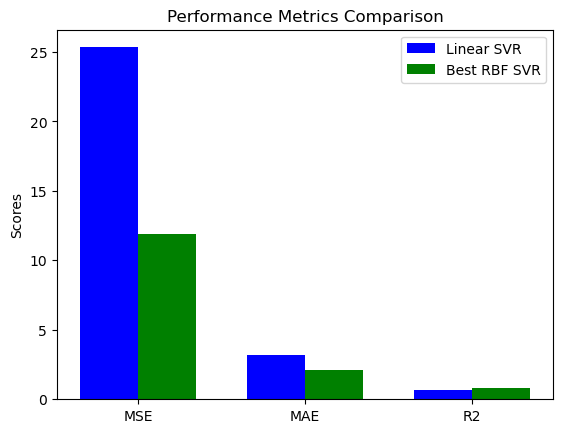

In [30]:
# Predict on the test set using the linear kernel SVR model
y_pred_linear = svr_linear.predict(X_test)

# Calculate performance metrics for the linear kernel SVR model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Calculate performance metrics for the RBF kernel SVR model
mse_rbf = mse_best  # From the previous best RBF model evaluation
mae_rbf = mae_best
r2_rbf = r2_best

# Print the performance metrics for linear kernel
print(f'Linear Kernel SVR Mean Squared Error: {mse_linear}')
print(f'Linear Kernel SVR Mean Absolute Error: {mae_linear}')
print(f'Linear Kernel SVR R² Score: {r2_linear}')

# Print the performance metrics for RBF kernel
print(f'Best RBF Kernel SVR Mean Squared Error: {mse_rbf}')
print(f'Best RBF Kernel SVR Mean Absolute Error: {mae_rbf}')
print(f'Best RBF Kernel SVR R² Score: {r2_rbf}')

# Plot the performance metrics for comparison
metrics = ['MSE', 'MAE', 'R2']
values_linear = [mse_linear, mae_linear, r2_linear]
values_rbf = [mse_rbf, mae_rbf, r2_rbf]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_linear, width, label='Linear SVR', color='blue')
rects2 = ax.bar(x + width/2, values_rbf, width, label='Best RBF SVR', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [35]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the dataset
bh_data = pd.read_csv('D:/CS Classes at GT/CS 7641 - ML/ASSIGNMENT-1/boston.csv')
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize lists for line plot data and variables for bar chart data
training_sizes_line, training_times_line, testing_times_line = [], [], []
training_time_bar, testing_time_bar, r2_score_bar, mae_bar, mse_bar = None, None, None, None, None

# Loop through training sizes for line plots
for size in np.linspace(0.1, 0.9, 9):
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, train_size=size, random_state=42)
    svr = SVR(kernel='linear')
    
    # Measure training time
    start_time = time.perf_counter()
    svr.fit(X_train_part, y_train_part)
    training_times_line.append((time.perf_counter() - start_time) / 10)  # Average over 10 iterations

    # Measure testing time
    start_time = time.perf_counter()
    for _ in range(100):  # Repeat predictions 100 times for averaging
        svr.predict(X_test)
    testing_times_line.append((time.perf_counter() - start_time) / 100)

# Metrics for bar chart at 100% training size
svr.fit(X_train, y_train)
y_pred_full_test = svr.predict(X_test)
training_time_bar, testing_time_bar = training_times_line[-1], testing_times_line[-1]
r2_score_bar, mae_bar, mse_bar = r2_score(y_test, y_pred_full_test), mean_absolute_error(y_test, y_pred_full_test), mean_squared_error(y_test, y_pred_full_test)

# Create DataFrames for line plots and bar chart data
line_plot_df = pd.DataFrame({'Training Size (%)': np.linspace(10, 90, 9), 'Training Time (s)': training_times_line, 'Testing Time (s)': testing_times_line})
bar_chart_df = pd.DataFrame({'Metric': ['R2-Score', 'MAE', 'MSE'], 'Value': [r2_score_bar, mae_bar, mse_bar]})


# Export to Excel
with pd.ExcelWriter(r'D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT-1\Boston Housing- Figures\boston_housing_svm_performance_analysis.xlsx') as writer:
    line_plot_df.to_excel(writer, sheet_name='Line Plots Data', index=False)
    bar_chart_df.to_excel(writer, sheet_name='Bar Chart Data', index=False)

